In [1]:
!pip install git+https://github.com/syngokhan/NLP_Preprocess.git

  Cloning https://github.com/syngokhan/NLP_Preprocess.git to /tmp/pip-req-build-ufktuk9t
  Running command git clone -q https://github.com/syngokhan/NLP_Preprocess.git /tmp/pip-req-build-ufktuk9t


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import Preprocess_gokhanEr as pp

from sklearn.metrics import recall_score,precision_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,MaxPooling1D,BatchNormalization,LSTM,Embedding
from tensorflow.keras.optimizers import Adam

In [3]:
path = "https://raw.githubusercontent.com/laxmimerit/poetry-data/master/adele.txt"

df = pd.read_csv(path , sep = "/t",header = None)
df.columns = ["Adele"]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Adele
0,Looking for some education
1,Made my way into the night
2,All that bullshit conversation
3,"Baby, can't you read the signs? I won't bore y..."
4,I don't even wanna waste your time


In [4]:
print("DataFrame Shape : {}".format(df.shape))

DataFrame Shape : (2400, 1)


In [5]:
data = []
for i in df["Adele"].values:
    data.append(i)

len(data)

2400

In [6]:
len(" ".join(data))

91329

# Build LSTM Model And Prepare X and Y

In [7]:
token = Tokenizer()
token.fit_on_texts(data)

In [8]:
token.word_counts

OrderedDict([('looking', 12),
             ('for', 145),
             ('some', 15),
             ('education', 2),
             ('made', 30),
             ('my', 370),
             ('way', 43),
             ('into', 23),
             ('the', 632),
             ('night', 26),
             ('all', 174),
             ('that', 255),
             ('bullshit', 2),
             ('conversation', 2),
             ('baby', 86),
             ("can't", 63),
             ('you', 866),
             ('read', 3),
             ('signs', 2),
             ('i', 935),
             ("won't", 51),
             ('bore', 4),
             ('with', 87),
             ('details', 4),
             ("don't", 134),
             ('even', 32),
             ('wanna', 18),
             ('waste', 9),
             ('your', 274),
             ('time', 63),
             ("let's", 10),
             ('just', 100),
             ('say', 74),
             ('maybe', 14),
             ('could', 42),
             ('help', 26),
    

In [9]:
token.word_index

{'i': 1,
 'you': 2,
 'the': 3,
 'me': 4,
 'to': 5,
 'it': 6,
 'and': 7,
 'my': 8,
 'your': 9,
 'that': 10,
 'love': 11,
 'of': 12,
 'in': 13,
 'all': 14,
 'we': 15,
 'a': 16,
 "i'm": 17,
 'when': 18,
 'but': 19,
 'be': 20,
 'for': 21,
 'so': 22,
 "don't": 23,
 'never': 24,
 "you're": 25,
 'let': 26,
 'if': 27,
 'is': 28,
 'know': 29,
 'up': 30,
 'go': 31,
 'down': 32,
 'will': 33,
 'on': 34,
 'just': 35,
 'do': 36,
 "ain't": 37,
 'heart': 38,
 'like': 39,
 'with': 40,
 'baby': 41,
 "it's": 42,
 'want': 43,
 'this': 44,
 "i've": 45,
 'say': 46,
 'no': 47,
 'as': 48,
 'had': 49,
 'make': 50,
 'can': 51,
 'out': 52,
 'ooh': 53,
 'was': 54,
 'one': 55,
 "can't": 56,
 'time': 57,
 'what': 58,
 'are': 59,
 'feel': 60,
 'see': 61,
 "i'll": 62,
 'fall': 63,
 'there': 64,
 'were': 65,
 'gonna': 66,
 'more': 67,
 "won't": 68,
 'oh': 69,
 'back': 70,
 'face': 71,
 'have': 72,
 'yeah': 73,
 'at': 74,
 "'cause": 75,
 'only': 76,
 'been': 77,
 'stand': 78,
 'ready': 79,
 'way': 80,
 'take': 81,
 'ha

In [10]:
encoded_text = token.texts_to_sequences(data)
encoded_text

[[254, 21, 219, 725],
 [117, 8, 80, 153, 3, 133],
 [14, 10, 726, 727],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2, 40, 3, 518, 41],
 [1, 23, 107, 189, 300, 9, 57],
 [286, 35, 46, 10, 230],
 [2, 83, 134, 4, 519, 8, 120],
 [1, 37, 520, 102, 19, 27, 25, 254, 21, 328, 11],
 [27, 209, 11, 13, 9, 124],
 [42, 67, 210, 125],
 [49, 219, 446, 11],
 [22, 328, 11, 28, 14, 10, 45, 220, 34, 8, 120, 53, 53],
 [53, 53, 254, 21, 219, 729],
 [117, 8, 80, 153, 3, 287],
 [8, 447, 220, 521, 730],
 [7, 329, 14, 522, 731],
 [1, 35, 189, 72, 219, 523, 1, 68, 517, 2, 40, 3, 518, 41],
 [1, 23, 107, 189, 300, 9, 57],
 [286, 35, 46, 10, 230],
 [2, 83, 134, 4, 519, 8, 120],
 [1, 37, 520, 102, 19, 27, 25, 254, 21, 328, 11],
 [27, 209, 11, 13, 9, 124],
 [42, 67, 210, 125],
 [45, 49, 219, 446, 11],
 [22, 328, 11, 28, 14, 10, 45, 220, 34, 8, 120, 53, 53],
 [41, 41],
 [53, 53],
 [41, 41],
 [53, 53],
 [41, 41],
 [53, 13, 3, 732, 12, 448],
 [1, 117, 8, 80, 153, 3, 133],
 [390, 733, 391, 34, 198, 4],
 [7, 1, 61, 108, 13, 288

In [11]:
x = ["i love you"]
token.texts_to_sequences(x)

[[1, 11, 2]]

In [12]:
len(token.word_counts),len(token.word_index)

(1395, 1395)

In [13]:
vocab_size = len(token.word_counts)

print("Normal Vocab Size : {}".format(vocab_size))

vocab_size = vocab_size + 1

print("Vocab Size : {}".format(vocab_size))

Normal Vocab Size : 1395
Vocab Size : 1396


# Prepare Training Data

In [14]:
test = [[164, 182, 62, 20, 3, 810, 10, 68, 26, 3, 139, 164, 137]]

datalist = []

for words in test:

    if len(words) > 1:

        for num in range(2,len(words)):

            datalist.append(words[:num])

datalist

[[164, 182],
 [164, 182, 62],
 [164, 182, 62, 20],
 [164, 182, 62, 20, 3],
 [164, 182, 62, 20, 3, 810],
 [164, 182, 62, 20, 3, 810, 10],
 [164, 182, 62, 20, 3, 810, 10, 68],
 [164, 182, 62, 20, 3, 810, 10, 68, 26],
 [164, 182, 62, 20, 3, 810, 10, 68, 26, 3],
 [164, 182, 62, 20, 3, 810, 10, 68, 26, 3, 139],
 [164, 182, 62, 20, 3, 810, 10, 68, 26, 3, 139, 164]]

In [15]:
# Kritik Nokta burda eğer sayısal veri değilse split methodu gerekiyor !!!

example = [token.sequences_to_texts(test)]
print(example)

liste = []

for words in example:
    words = words[0].split()
    if len(words) > 1 :
       
        for num in range(2,len(words)):
            liste.append(words[:num])

liste

[["come whenever i'll be the shelter that won't let the rain come through"]]


[['come', 'whenever'],
 ['come', 'whenever', "i'll"],
 ['come', 'whenever', "i'll", 'be'],
 ['come', 'whenever', "i'll", 'be', 'the'],
 ['come', 'whenever', "i'll", 'be', 'the', 'shelter'],
 ['come', 'whenever', "i'll", 'be', 'the', 'shelter', 'that'],
 ['come', 'whenever', "i'll", 'be', 'the', 'shelter', 'that', "won't"],
 ['come', 'whenever', "i'll", 'be', 'the', 'shelter', 'that', "won't", 'let'],
 ['come',
  'whenever',
  "i'll",
  'be',
  'the',
  'shelter',
  'that',
  "won't",
  'let',
  'the'],
 ['come',
  'whenever',
  "i'll",
  'be',
  'the',
  'shelter',
  'that',
  "won't",
  'let',
  'the',
  'rain'],
 ['come',
  'whenever',
  "i'll",
  'be',
  'the',
  'shelter',
  'that',
  "won't",
  'let',
  'the',
  'rain',
  'come']]

In [16]:
# +1 olarak denesene bir sonra !!!

all_data = []

for words in encoded_text:
    if len(words) > 1:
        for num in range(2,len(words) + 1):
            all_data.append(words[:num])

all_data        

[[254, 21],
 [254, 21, 219],
 [254, 21, 219, 725],
 [117, 8],
 [117, 8, 80],
 [117, 8, 80, 153],
 [117, 8, 80, 153, 3],
 [117, 8, 80, 153, 3, 133],
 [14, 10],
 [14, 10, 726],
 [14, 10, 726, 727],
 [41, 56],
 [41, 56, 2],
 [41, 56, 2, 603],
 [41, 56, 2, 603, 3],
 [41, 56, 2, 603, 3, 728],
 [41, 56, 2, 603, 3, 728, 1],
 [41, 56, 2, 603, 3, 728, 1, 68],
 [41, 56, 2, 603, 3, 728, 1, 68, 517],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2, 40],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2, 40, 3],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2, 40, 3, 518],
 [41, 56, 2, 603, 3, 728, 1, 68, 517, 2, 40, 3, 518, 41],
 [1, 23],
 [1, 23, 107],
 [1, 23, 107, 189],
 [1, 23, 107, 189, 300],
 [1, 23, 107, 189, 300, 9],
 [1, 23, 107, 189, 300, 9, 57],
 [286, 35],
 [286, 35, 46],
 [286, 35, 46, 10],
 [286, 35, 46, 10, 230],
 [2, 83],
 [2, 83, 134],
 [2, 83, 134, 4],
 [2, 83, 134, 4, 519],
 [2, 83, 134, 4, 519, 8],
 [2, 83, 134, 4, 519, 8, 120],
 [1, 37],
 [1, 37, 520],
 [1, 37,

# Padding

In [17]:
length = []

for words in data:
    length.append(len(words.split()))

np.max(length)

30

In [18]:
length = []

for words in all_data:
    length.append(len(words))

np.max(length)

30

In [19]:
max_length = 20

T = pad_sequences(all_data , maxlen = max_length, padding = "post")
T[:5]

array([[254,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [254,  21, 219,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [254,  21, 219, 725,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [117,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0],
       [117,   8,  80,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [20]:
max_length = 30
sequences = pad_sequences(all_data, maxlen = max_length, padding = "pre")
sequences[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 254,  21],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 254,  21, 219],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        254,  21, 219, 725],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 117,   8],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 117,   8,  80]], dtype=int32)

In [21]:
sequences.shape

(16624, 30)

In [22]:
sequences[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 254,  21], dtype=int32)

In [23]:
# Yapmak istediğim !!!!
sequences[0][:-1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 254], dtype=int32)

In [24]:
X = sequences[:,:-1]
y = sequences[:,-1]

In [25]:
vocab_size

1396

In [26]:
# Bizim bulmak istediğimiz yani hedefimiz cümlenin sonuna gelicek olan kelime oda bu şarkının yada şiirin içinde ki kelime sayısı kadar hedefimiz var !!!!

y_cat = to_categorical(y ,num_classes = vocab_size)
y_cat.shape

(16624, 1396)

In [27]:
seq_length = X.shape[1]
seq_length,vocab_size

(29, 1396)

# LSTM Model Training

In [28]:
model = Sequential()

model.add(Embedding(input_dim = vocab_size , output_dim = 50 , input_length = seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))

model.add(Dense(100, activation = "relu"))
model.add(Dense(vocab_size,activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 50)            69800     
                                                                 
 lstm (LSTM)                 (None, 29, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 1396)              140996    
                                                                 
Total params: 361,696
Trainable params: 361,696
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model.fit(X, y_cat, batch_size=32 , epochs = 50)

Epoch 1/50
520/520 [==============================] - 16s 21ms/step - loss: 5.8341 - accuracy: 0.0415
Epoch 2/50
520/520 [==============================] - 11s 21ms/step - loss: 5.4162 - accuracy: 0.0523
Epoch 3/50
520/520 [==============================] - 11s 21ms/step - loss: 5.2018 - accuracy: 0.0564
Epoch 4/50
520/520 [==============================] - 11s 21ms/step - loss: 5.0155 - accuracy: 0.0691
Epoch 5/50
520/520 [==============================] - 11s 21ms/step - loss: 4.8584 - accuracy: 0.0789
Epoch 6/50
520/520 [==============================] - 11s 21ms/step - loss: 4.6996 - accuracy: 0.0935
Epoch 7/50
520/520 [==============================] - 11s 21ms/step - loss: 4.5541 - accuracy: 0.1032
Epoch 8/50
520/520 [==============================] - 11s 21ms/step - loss: 4.4042 - accuracy: 0.1208
Epoch 9/50
520/520 [==============================] - 11s 21ms/step - loss: 4.2668 - accuracy: 0.1345
Epoch 10/50
520/520 [==============================] - 11s 21ms/step - loss: 4.130

In [30]:
def history_graph(history):

    size = 15
    length = len(history.history["accuracy"])

    plt.figure(figsize = (15,7))
    
    plt.plot(history.history["accuracy"], label = "Accuracy Score")
    plt.plot(history.history["loss"],label = "Loss")
    
    plt.legend(loc = "best")
    plt.xlabel("Epochs",size = size)
    plt.ylabel("Accuracy Score" , size = size)
    plt.xticks(range(0,length+1))

    plt.title("History Graph", size = size )

    plt.show()

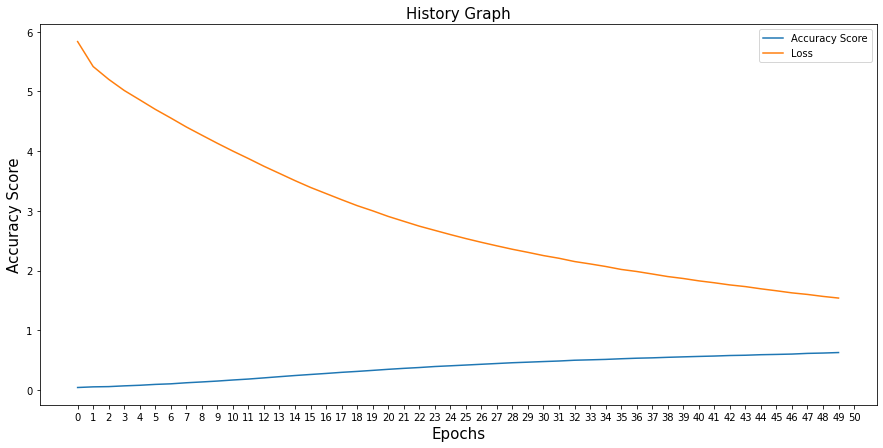

In [31]:
history_graph(history)

# Poerty Generation

In [32]:
deneme = np.array([[1,2,3,15],[12,3,4,5]])
np.argmax(deneme, axis = 1),np.argmax(deneme, axis = -1),max_length

(array([3, 0]), array([3, 0]), 30)

In [37]:
def generate_poetry(seed_text, rows, poetry_length):
    
    for i in range(rows):

        text = []

        for _ in range(poetry_length):

            encoded = token.texts_to_sequences([seed_text])
            encoded = pad_sequences(encoded, maxlen=29, padding = "pre")

            # Bur bir değer yani yüksek olanı seçiyorum !!!
            y_pred = np.argmax(model.predict(encoded), axis = 1)
           
            predicted_word = ""

            for word,index in token.word_index.items():
                if index == y_pred:
                    predicted_word = word
                    break

            seed_text = seed_text + " " + predicted_word
            text.append(predicted_word)
            
            print(_)
            print(seed_text)
            print(text)
            print("------")  

        print("******")
        print(text)
        print("******")
            
        seed_text = text[-1]
        
        print("******")
        print(seed_text)
        print("******")
        
        text = " ".join(text)
        
        print("******")
        print(text)
        print("******")

In [38]:
generate_poetry(seed_text = "i love you", rows = 2, poetry_length=5)

0
i love you when
['when']
------
1
i love you when the
['when', 'the']
------
2
i love you when the day
['when', 'the', 'day']
------
3
i love you when the day is
['when', 'the', 'day', 'is']
------
4
i love you when the day is done
['when', 'the', 'day', 'is', 'done']
------
******
['when', 'the', 'day', 'is', 'done']
******
******
done
******
******
when the day is done
******
0
done that
['that']
------
1
done that we
['that', 'we']
------
2
done that we know
['that', 'we', 'know']
------
3
done that we know i
['that', 'we', 'know', 'i']
------
4
done that we know i told
['that', 'we', 'know', 'i', 'told']
------
******
['that', 'we', 'know', 'i', 'told']
******
******
told
******
******
that we know i told
******


In [49]:
def generate_poetry(seed_text, rows, poetry_length):
    
    for i in range(rows):

        text = []

        # Şiirimizin her satırdaki kelime sayısı belirleniyor 3 ise 3 tane kelime çıkıcak !!!!!
        for _ in range(poetry_length):

            encoded = token.texts_to_sequences([seed_text])
            encoded = pad_sequences(encoded, maxlen=30, padding = "pre")

            # Bur bir değer yani yüksek olanı seçiyorum !!!
            y_pred = np.argmax(model.predict(encoded), axis = 1)
           
            predicted_word = ""

            for word,index in token.word_index.items():
                if index == y_pred:
                    predicted_word = word
                    break

            # Burda seed_text üzerinde tahmin ettiğim ekleniyor ve test listesine de tahmin ettiğim ekleniyor !!!!

            seed_text = seed_text + " " + predicted_word
            text.append(predicted_word)

        # Yeni satırın oluşması için yeni kelime (tek bir tane en son tahmin ettiği) çıktı şimdi buna göre tahmin edip şiir yazıcak
        seed_text = text[-1]        
        
        # Tahmin edilen kelimeleri birleştirip ekrana yazacağız !!!!

        text = " ".join(text)

        print(text)
      

In [50]:
generate_poetry(seed_text = "i love you so much", rows = 3 , poetry_length= 5)

to be mine yeah sure
we start to think to
make us grow from dust


In [43]:
# Step 1

liste = []
x = "i love you so much"

enc = token.texts_to_sequences([x])
enc = pad_sequences(enc, maxlen = 30 , padding = "pre")
y_pred = np.argmax(model.predict(enc), axis = 1)
y_pred

array([5])

In [44]:
# Step 2
token.word_index.items()

dict_items([('i', 1), ('you', 2), ('the', 3), ('me', 4), ('to', 5), ('it', 6), ('and', 7), ('my', 8), ('your', 9), ('that', 10), ('love', 11), ('of', 12), ('in', 13), ('all', 14), ('we', 15), ('a', 16), ("i'm", 17), ('when', 18), ('but', 19), ('be', 20), ('for', 21), ('so', 22), ("don't", 23), ('never', 24), ("you're", 25), ('let', 26), ('if', 27), ('is', 28), ('know', 29), ('up', 30), ('go', 31), ('down', 32), ('will', 33), ('on', 34), ('just', 35), ('do', 36), ("ain't", 37), ('heart', 38), ('like', 39), ('with', 40), ('baby', 41), ("it's", 42), ('want', 43), ('this', 44), ("i've", 45), ('say', 46), ('no', 47), ('as', 48), ('had', 49), ('make', 50), ('can', 51), ('out', 52), ('ooh', 53), ('was', 54), ('one', 55), ("can't", 56), ('time', 57), ('what', 58), ('are', 59), ('feel', 60), ('see', 61), ("i'll", 62), ('fall', 63), ('there', 64), ('were', 65), ('gonna', 66), ('more', 67), ("won't", 68), ('oh', 69), ('back', 70), ('face', 71), ('have', 72), ('yeah', 73), ('at', 74), ("'cause", 7

In [45]:
predicted_word = ""
for word,index in  token.word_index.items():

    if index == y_pred:
        predicted_word = word
        break
predicted_word

'to'

In [46]:
x = x + " " + predicted_word
liste.append(predicted_word)
liste,x

(['to'], 'i love you so much to')

In [47]:
enc = token.texts_to_sequences([x])
enc = pad_sequences(enc, maxlen = 30 , padding = "pre")
y_pred = np.argmax(model.predict(enc), axis = 1)

predicted_word = ""
for word,index in  token.word_index.items():

    if index == y_pred:
        predicted_word = word
        break


x = x + " " + predicted_word
liste.append(predicted_word)
liste,x

(['to', 'be'], 'i love you so much to be')

In [48]:
# Böyle Devam Eder !!!! ....

enc = token.texts_to_sequences([x])
enc = pad_sequences(enc, maxlen = 30 , padding = "pre")
y_pred = np.argmax(model.predict(enc), axis = 1)

predicted_word = ""
for word,index in  token.word_index.items():

    if index == y_pred:
        predicted_word = word
        break


x = x + " " + predicted_word
liste.append(predicted_word)
liste,x

(['to', 'be', 'mine'], 'i love you so much to be mine')